#### Simple_Regression

In [1]:
x = [5, 3, -1, 2, 6]
y = [14, 6, -5.5, 3.5, 18]
print(x, y)

[5, 3, -1, 2, 6] [14, 6, -5.5, 3.5, 18]


In [2]:
sum_of_x = 0
sum_of_y = 0
sum_of_xy_product = 0
cumulative_powers_of_x = 0
n = len(x) 

for i in range(n):
    sum_of_x += x[i]
    sum_of_y += y[i]
    sum_of_xy_product += x[i] * y[i]
    cumulative_powers_of_x += x[i] ** 2 

print("n:",n,
    "\n sum_of_x:", sum_of_x,
    "\n sum_of_y:", sum_of_y,
    "\n sum_of_xy_product:", sum_of_xy_product,
    "\n cumulative_powers_of_x:", cumulative_powers_of_x )



n: 5 
 sum_of_x: 15 
 sum_of_y: 36.0 
 sum_of_xy_product: 208.5 
 cumulative_powers_of_x: 75


In [3]:
# y = ax + b
# slope (a):
w1 = (n * sum_of_xy_product - sum_of_x * sum_of_y ) / (n * cumulative_powers_of_x - sum_of_x**2)
print("w1: ", w1)
# intercept (b):
w0 = (sum_of_y - w1 * sum_of_x) / n
print("w2: ", w0)

w1:  3.35
w2:  -2.85


### Illustrating This Experiment for 1000 of points(n=1000):

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets


ModuleNotFoundError: No module named 'sklearn'

In [ ]:
#Simulation Data:[Appendix1]
n = 1000
x = np.random.normal(3, 5, size=n)
# np.random.normal(0, 3, size=n) is a noise in form of a normal 
# distribution with average of 0 and variance if 3
y = -15 * x + 20 + np.random.normal(0, 3, size=n)

In [ ]:
sum_x = np.sum(x)
sum_y = np.sum(y)

w1 = (n * np.dot(x,y) - sum_x * sum_y ) / (n * np.dot(x,x) - sum_x**2)
w0 = ( sum_y - w1 * sum_x ) / n

w1, w0 = round(w1, 3), round(w0, 3)
print(f" y={w1}x + {w0} ")


 y=-15.014x + 19.963 


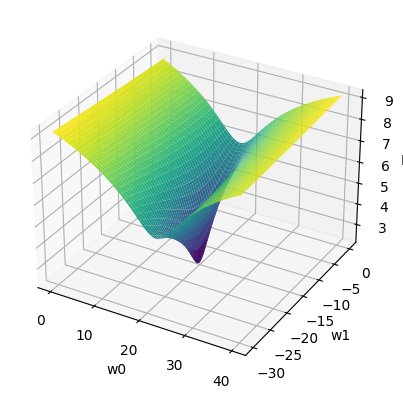

shape of z_axis:(100, 100) := 2D vector with 100 row and 100 columns
shape of w0_values:(100,) := 1D vector with 100 elements
shape of parameter_w0:(100, 100) := 2D vector with 100 row and 100 columns


In [ ]:
#mean square error:
"""We used Mean Squared Error (MSE) as 
our loss function because minimizing the
average error and minimizing the total
error will lead to the same optimal
solution. Both approaches will converge
at the same point, making MSE a suitable
choice for our analysis. difference will
be a coefficient of 1/n"""
def MSE_loss(w0, w1, x, y):
    prediction = w0 + w1 * x
    loss = np.sum( (prediction - y)**2 ) / len(y)
    return loss

#generating a grid of w0 and w1 values around w0=20 and b1=-15
"""The np.linspace function generates an array of
 evenly spaced values over a specified range"""
w0_values = np.linspace(0, 40, 100)
w1_values = np.linspace(-30, 0, 100)


#log scale is used only for better visualization:
z_axis = np.zeros ( ( len(w0_values), len(w1_values) ))
for i in range(len(w0_values)):
    for j in range(len(w1_values)):
        z_axis[i,j] = np.log(MSE_loss(w0=w0_values[i], w1=w1_values[j], x=x, y=y))
       

"""3D plot of MSE loss in log-scale:"""
# Create a new figure for 3D plotting
fig = plt.figure()
# Add a 3D subplot to the figure
'''111 := nrows=1,ncols=1, index=1,
111 means you are creating a single subplot in
a 1x1 grid, which is effectively the only subplot
in the figure.'''
axes = fig.add_subplot(111, projection='3d')
# Create a meshgrid for the parameter values[Appendix2]
parameter_w0, parameter_w1 = np.meshgrid(w0_values, w1_values)

axes.plot_surface(parameter_w0, parameter_w1, z_axis, cmap="viridis")

#Axis Labeling:
axes.set_xlabel('w0')
axes.set_ylabel('w1')
axes.set_zlabel('Loss')

plt.show()

print(f"shape of z_axis:{z_axis.shape} := 2D vector with 100 row and 100 columns" )
print(f"shape of w0_values:{w0_values.shape} := 1D vector with 100 elements" )
print(f"shape of parameter_w0:{parameter_w0.shape} := 2D vector with 100 row and 100 columns" )

### Illustrate Linear Regression for D-space vector:

#### Generate Synthetic Data:


In [ ]:
def generate_data(n, noise):
    np.random.seed(42)
    X = np.linspace(-10, 10, 50)
    # truth line := y = 3x + 8
    true_slope = 3
    true_intercept = 8
    noise = np.random.normal(size=n) * noise
    y = true_slope * X + true_intercept + noise
    return X, y 

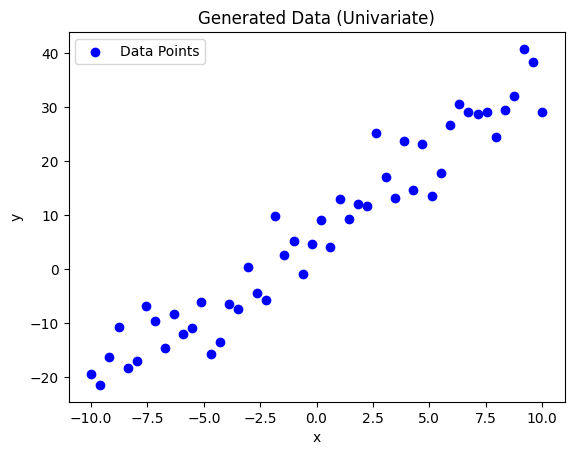

In [ ]:
X, y = generate_data(n=50, noise=5)
plt.scatter(X, y, color="blue", label="Data Points")
plt.title("Generated Data (Univariate)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


#### Implement the Closed-Form Solution:

In [ ]:
from numpy.linalg import inv

In [ ]:
def linear_regression_closed_form(X,y):
    # Adding bias term (x_0 = 1) to input vector X [Appendix 3]
    X_b = np.c_[np.ones((len(X), 1)), X]  # X_b is now the full input vector with bias term [Appendix 4]

    #(x^T x)^-1 * y^T * X 
    w = np.dot(inv(np.dot(X_b.transpose(), X_b)), np.dot(y.T, X_b ) ) 
    return w

def hypothesis_vector(x, w):
    return w[0] + w[1] * x

# # Get parameter vector w
w = linear_regression_closed_form(X, y)

print(f"Parameters (w): ")
print(f"w_1 = {w[1]:.2f}, w_0 = {w[0]:.2f}")



Parameters (w): 
w_1 = 2.86, w_0 = 6.87


#### Visualize the Closed-Form Solution:

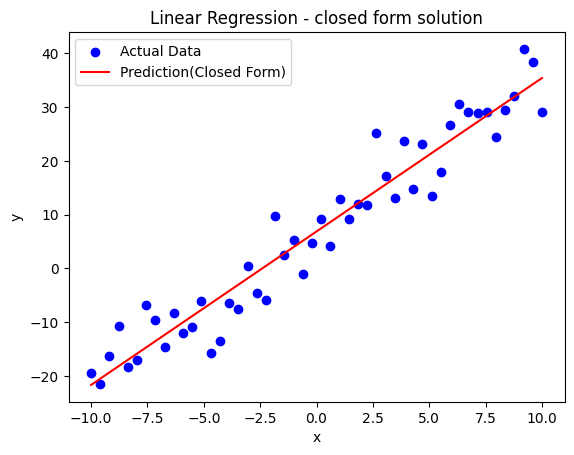

In [ ]:
y_prediction = hypothesis_vector(x=X, w=w)
X, y = generate_data(n=50, noise=5)
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, y_prediction, color="red", label="Prediction(Closed Form)")
plt.title("Linear Regression - closed form solution")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

### Gradient Decent

#### Define a Convex Cost Function:

In [6]:
#function is: w0^2 + 2w1^2
def J_convex(w):
    return w[0]**2 + (2 * w[1]**2)
#derivative of function is: 2w0 + 4w1

def grad_J_convex(w):
    return np.array([2*w[0], 4 * w[1]])

#### Implement Gradient Descent:

In [10]:
def gradient_descent(grad, w_init, learning_rate=0.1, num_steps=20):
    w = np.array(w_init)
    path  = [w.copy()]

    for step in range(num_steps):
        grad_w = grad(w)
        w =  w - learning_rate * grad_w
        path.append(w.copy())
    return np.array(path)


#### Visualize Gradient Descent:

C:\Users\Surface\AppData\Local\Temp/ipykernel_17212/710595586.py:11: UserWarning: The following kwargs were not used by contour: 'level', 'camp'
  plt.contour(w1_mesh_grid, w2_mesh_grid, J_values, level=counter_levels, camp='jet')


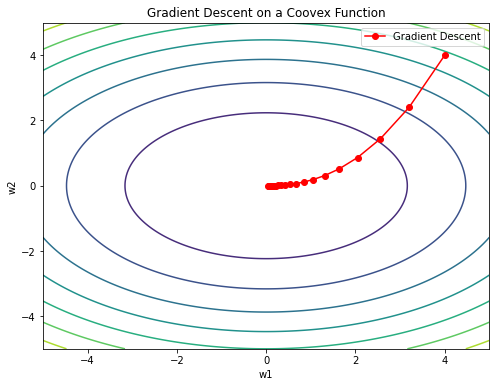

In [13]:
w_init = [4, 4]
path_convex = gradient_descent(grad_J_convex, w_init, learning_rate=0.1, num_steps=20)

w1_values = np.linspace(-5, 5, 400)
w2_values = np.linspace(-5, 5, 400)
w1_mesh_grid, w2_mesh_grid = np.meshgrid(w1_values, w2_values)
J_values = J_convex([w1_mesh_grid, w2_mesh_grid])

plt.figure(figsize=(8, 6))
counter_levels = np.logspace(-0.5 , 3, 35)
plt.contour(w1_mesh_grid, w2_mesh_grid, J_values, level=counter_levels, camp='jet')
path_x , path_y = path_convex[:, 0], path_convex[:, 1]
plt.plot(path_x, path_y, color='red', marker='o',label='Gradient Descent')

plt.title("Gradient Descent on a Coovex Function")
plt.xlabel("w1")
plt.ylabel("w2")

plt.legend()
plt.show()

#### Visualize 3D Gradient Descent:

In [15]:
#TODO: Visualize 3D Gradient Descent:

### Appendices:


In [16]:
"""Appendix 1"""
#works:
x_test = np.random.normal(3, 5, size=4)
y_test = 4 * x_test + 10
print(f"x test: {x_test} \n y test: {y_test}" )

#doesn't work:
x_test_1 = [1, 2, 3, 4]
y_test_1 = -15 * x_test_1 + 20
print(y_test_1)

#Explanation:
# Element-wise Operations: In NumPy, when you perform operations like -15 * x,
# it applies the multiplication to each element of the array x.
# This is different from standard Python lists,
# where you cannot directly multiply a list by a scalar.

x test: [ 3.58838864 14.62860451  1.1847359   0.04094452] 
 y test: [24.35355457 68.51441804 14.73894361 10.16377806]


TypeError: can only concatenate list (not "int") to list

In [ ]:
"""Appendix 2"""

"""
The np.meshgrid function generates coordinate
matrices(grids) from the provided coordinate vectors.
"""

test_w0 = [3, 5, 7, 9]
test_w1 = [10, 20, 30, 40]
test_par_w0, test_par_w1 = np.meshgrid(test_w0, test_w1)

print (f"test_w0: {test_w0} \n \
        test_par_w0: {test_par_w0} \n \
        test_w1: {test_w1} \n \
        test_par_w1: {test_par_w1}\n")

print (f"test_par_w0, test_par_w1: {test_par_w0, test_par_w1}  ")


#(W0[i, j], W1[i, j], Z[i, j])

test_w0: [3, 5, 7, 9] 
         test_par_w0: [[3 5 7 9]
 [3 5 7 9]
 [3 5 7 9]
 [3 5 7 9]] 
         test_w1: [10, 20, 30, 40] 
         test_par_w1: [[10 10 10 10]
 [20 20 20 20]
 [30 30 30 30]
 [40 40 40 40]]

test_par_w0, test_par_w1: (array([[3, 5, 7, 9],
       [3, 5, 7, 9],
       [3, 5, 7, 9],
       [3, 5, 7, 9]]), array([[10, 10, 10, 10],
       [20, 20, 20, 20],
       [30, 30, 30, 30],
       [40, 40, 40, 40]]))  


Q: why we use meshgrid?
Function Evaluation: When you want to evaluate a function of two variables (e.g., f(x,y)), you need to consider all combinations of x and y values. A mesh grid allows you to create a grid of points where each point corresponds to a unique pair of (x, y) coordinates.

Example:
x = [1, 2, 3, ,4] 
y = [10, 20, 30, 40]

(x,y) = (1,10) (2,20) (3,30) (4,40)
Q: What about the (1,20)? or (1,30)? or (1,40)?
A: So we gonna use the meshgrid function to create a grid of points where each point corresponds to a unique pair of (x, y) coordinates.

meshgrid will create a 2d vector of the x by using this row as column and make a row based on a each value at the y matrix:

X_mesh =
\begin{bmatrix}
1 & 2 & 3 & 4 \\
1 & 2 & 3 & 3 \\
1 & 2 & 3 & 4 \\
1 & 2 & 3 & 4 \\
\end{bmatrix}

Y_mesh =
\begin{bmatrix}
10 & 10 & 10 & 10 \\
20 & 20 & 20 & 20 \\
30 & 30 & 30 & 30 \\
40 & 40 & 40 & 40 \\
\end{bmatrix}

Result: The meshgrid function creates a grid of points where each point corresponds to a unique pair of (x, y) coordinates.
\begin{bmatrix}
f(1,10) & f(1,20) & f(1,30) & f(1,40) \\
f(2,10) & f(2,20) & f(2,30) & f(2,40) \\
f(3,10) & f(3,20) & f(3,30) & f(3,40) \\
f(4,10) & f(4,20) & f(4,30) & f(4,40) \\
\end{bmatrix}

Step 1: Define the Ranges

We start with the ranges for $x$ and $y$:

- **x values**: $[-1, 0, 1]$
- **y values**: $[-1, 0, 1]$

Step 2: Create the Mesh Grid

Using the defined ranges, we create the mesh grid. The mesh grid generates two matrices, $X$ and $Y$, where:

- **Matrix $X$** contains the x-coordinates repeated for each y-value.
- **Matrix $Y$** contains the y-coordinates repeated for each x-value.

Calculation of Matrices

1. **Matrix $X$**:
   - For each value of $y$, the corresponding $x$ values are repeated across the rows.
   - Since there are 3 $y$ values, each $x$ value will appear in each row.

X =
\begin{bmatrix} 
-1 & 0 & 1 \\
-1 & 0 & 1 \\
-1 & 0 & 1 
\end{bmatrix}

2. **Matrix $Y$**:
   - For each value of $x$, the corresponding $y$ values are repeated down the columns.
   - Since there are 3 $x$ values, each $y$ value will appear in each column.

Y = 
\begin{bmatrix}
-1 & -1 & -1 \\
0 & 0 & 0 \\
1 & 1 & 1
\end{bmatrix}

Step 3: Evaluate the Function

Now that we have the matrices $X$ and $Y$, we can evaluate the function $f(x, y) = x^2 + y^2$ at each point represented by the pairs $(X[i, j], Y[i, j])$.

 Calculation of Matrix $Z$

1. **Matrix $Z$** will contain the results of the function evaluations for each pair of $(x, y)$:
   - For each element in $X$ and $Y$, we compute:
   $$Z[i, j] = f(X[i, j], Y[i, j]) = X[i, j]^2 + Y[i, j]^2$$

2. **Calculating Each Element**:
   - For $Z[0, 0]$:
     $$Z[0, 0] = f(-1, -1) = (-1)^2 + (-1)^2 = 1 + 1 = 2$$
   - For $Z[0, 1]$:
     $$Z[0, 1] = f(-1, 0) = (-1)^2 + 0^2 = 1 + 0 = 1$$
   - For $Z[0, 2]$:
     $$Z[0, 2] = f(-1, 1) = (-1)^2 + 1^2 = 1 + 1 = 2$$
   - For $Z[1, 0]$:
     $$Z[1, 0] = f(0, -1) = 0^2 + (-1)^2 = 0 + 1 = 1$$
   - For $Z[1, 1]$:
     $$Z[1, 1] = f(0, 0) = 0^2 + 0^2 = 0 + 0 = 0$$
   - For $Z[1, 2]$:
     $$Z[1, 2] = f(0, 1) = 0^2 + 1^2 = 0 + 1 = 1$$
   - For $Z[2, 0]$:
     $$Z[2, 0] = f(1, -1) = 1^2 + (-1)^2 = 1 + 1 = 2$$




#### Appendix 3

###### Question 1: Why was $ x_0 = 1 $ added to the code?

In the context of linear regression, the term $ x_0 = 1 $ is added to the input vector to account for the intercept (bias) term in the linear model. The hypothesis for a linear regression model can be expressed as:

$$h_w(x) = w_0 + w_1 \cdot x_1$$

Where:
- $ h_w(x) $ is the predicted output.
- $ w_0 $ is the intercept (bias term).
- $ w_1 $ is the coefficient for the feature $ x_1 $.

###### Reasons for Adding $ x_0 = 1 $:
1. **Intercept Term**: Allows the regression line to shift up or down, enabling the model to fit data that does not pass through the origin.
2. **Matrix Representation**: Facilitates the use of matrix operations by allowing the intercept to be treated as another coefficient in the weight vector $ w $.

By using `np.c_[np.ones((len(X), 1)), X]`, you create a new matrix $ X_b $ that includes a column of ones, allowing the hypothesis to be expressed as:

$$h_w(X) = X_b \cdot w$$

###### Question 2: What happens if we don't have it?

If you do not include the bias term (intercept) in your linear regression model, several important consequences can arise:

1. **Model Assumption**: The model assumes that the regression line must pass through the origin (0,0), which may not be true for many datasets.
2. **Bias in Predictions**: The model may produce biased predictions, systematically underpredicting or overpredicting the output, especially if the true relationship has a non-zero intercept.
3. **Reduced Flexibility**: The model's ability to fit the data is limited, potentially leading to overfitting or underfitting.
4. **Mathematical Representation**: Without the bias term, the hypothesis is represented as:
   $$h_w(x) = w_1 \cdot x_1 + w_2 \cdot x_2 + \ldots + w_n \cdot x_n$$
   Including the bias allows for:
   $$h_w(x) = w_0 + w_1 \cdot x_1 + w_2 \cdot x_2 + \ldots + w_n \cdot x_n$$
5. **Impact on Coefficients**: The coefficients may be skewed or misestimated as they try to compensate for the lack of an intercept, leading to incorrect interpretations.

###### Conclusion
In summary, omitting the bias term can lead to significant issues, including biased predictions and a failure to accurately capture the underlying relationship in the data. It is generally best practice to include the intercept term unless there is a specific reason to believe that the relationship should pass through the origin.


In [ ]:
"""Appendix 4"""
DATASET = [1, 2, 3, 4]
DATASET_TEST = np.c_[np.ones((len(DATASET), 1)), DATASET]
print(f"DATASET_TEST: \n {DATASET_TEST} \n")

"Explaining np.c_"
#np.c_[ $column_you_want_to_add, $dataset_that_you_want_add_column_to ]
#This is a convenient way to concatenate arrays along the second axis (columns).
#Adding a column to the begin of an Array
DATASET_1 = [31, 32, 33, 34]
DATASET_1_TEST = np.c_[[10, 20, 30, 40] , DATASET_1]
print(f"DATASET_1_TEST: \n {DATASET_1_TEST} \n")

"Explaining np.ones"
#np.ones( ($number_of_rows, $number_of_columns),$data_type )
print(np.ones( (3,10) ))




DATASET_TEST: 
 [[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]] 

DATASET_1_TEST: 
 [[10 31]
 [20 32]
 [30 33]
 [40 34]] 

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


1. **Let $ \mathbf{X} $ be the original dataset**:
   $$\mathbf{X} = \begin{bmatrix}    x_{11} & x_{12} & \ldots & x_{1n} \\    x_{21} & x_{22} & \ldots & x_{2n} \\    \vdots & \vdots & \ddots & \vdots \\    x_{m1} & x_{m2} & \ldots & x_{mn}    \end{bmatrix}$$
   where $ m $ is the number of samples (rows) and $ n $ is the number of features (columns).

2. **Create a column of ones**:
   $$\mathbf{1} = \begin{bmatrix}    1 \\    1 \\    \vdots \\    1    \end{bmatrix}$$
   This column vector has $ m $ rows.

3. **Concatenate the column of ones with the dataset**:
   The operation performed by `np.c_` can be represented as:
   $$\mathbf{X}_{\text{test}} = \begin{bmatrix}    1 & x_{11} & x_{12} & \ldots & x_{1n} \\    1 & x_{21} & x_{22} & \ldots & x_{2n} \\    \vdots & \vdots & \ddots & \vdots \\    1 & x_{m1} & x_{m2} & \ldots & x_{mn}    \end{bmatrix}$$

4. **Final representation**:
   Thus, the final dataset with the added column of ones can be expressed as:
   $$\mathbf{X}_{\text{test}} = \begin{bmatrix}    \mathbf{1} & \mathbf{X}    \end{bmatrix}$$
